In [ ]:
import pandas as pd
data=pd.read_csv("/content/dva5-dva.csv")
data


,Patient ID,Date,Name,Doctor Name,Issue,Treatment,Outcome,Price
0,DA22701,16-10-2022,Krishna,Dr. Kishore Kumar,Headache,Ayurvedic massage and herbs,Successful,12000
1,DA22702,16-10-2022,Radha,Dr. Kishore Kumar,Back pain,Yoga and acupuncture,Successful,5000
2,DA22703,16-10-2022,Arjun,Dr. Kishore Kumar,Acne,Yoga and acupuncture,Successful,5000
3,DA22704,16-10-2022,Sita,Dr. Kishore Kumar,Stress,Yoga and acupuncture,Successful,5000
4,DA22705,16-10-2022,Ram,Dr. Kishore Kumar,Insomnia,Yoga and acupuncture,Unsuccessful,5000
...,...,...,...,...,...,...,...,...
94,DA22795,23-10-2022,Akshath,Dr. Kishore Kumar,Tooth Ache,Ayurvedic Herbs and Medicines,Successful,1000
95,DA22796,23-10-2022,Vijaykanth,Dr. Kishore Kumar,Diabetic ulcer,Jaloukavacharana,Successful,5000
96,DA22797,23-10-2022,Bala Sundar,Dr. Kishore Kumar,migraine,Shirodhara,Successful,4000
97,DA22798,23-10-2022,Ranjith,Dr. Kishore Kumar,Knee pain,Elakkizhhi,Successful,3000


In [ ]:
data.shape

(99, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient ID   99 non-null     object
 1   Date         99 non-null     object
 2   Name         99 non-null     object
 3   Doctor Name  99 non-null     object
 4   Issue        99 non-null     object
 5   Treatment    99 non-null     object
 6   Outcome      99 non-null     object
 7   Price        99 non-null     int64 
dtypes: int64(1), object(7)
memory usage: 6.3+ KB


In [ ]:
data.isnull().sum()

Patient ID     0
Date           0
Name           0
Doctor Name    0
Issue          0
Treatment      0
Outcome        0
Price          0
dtype: int64

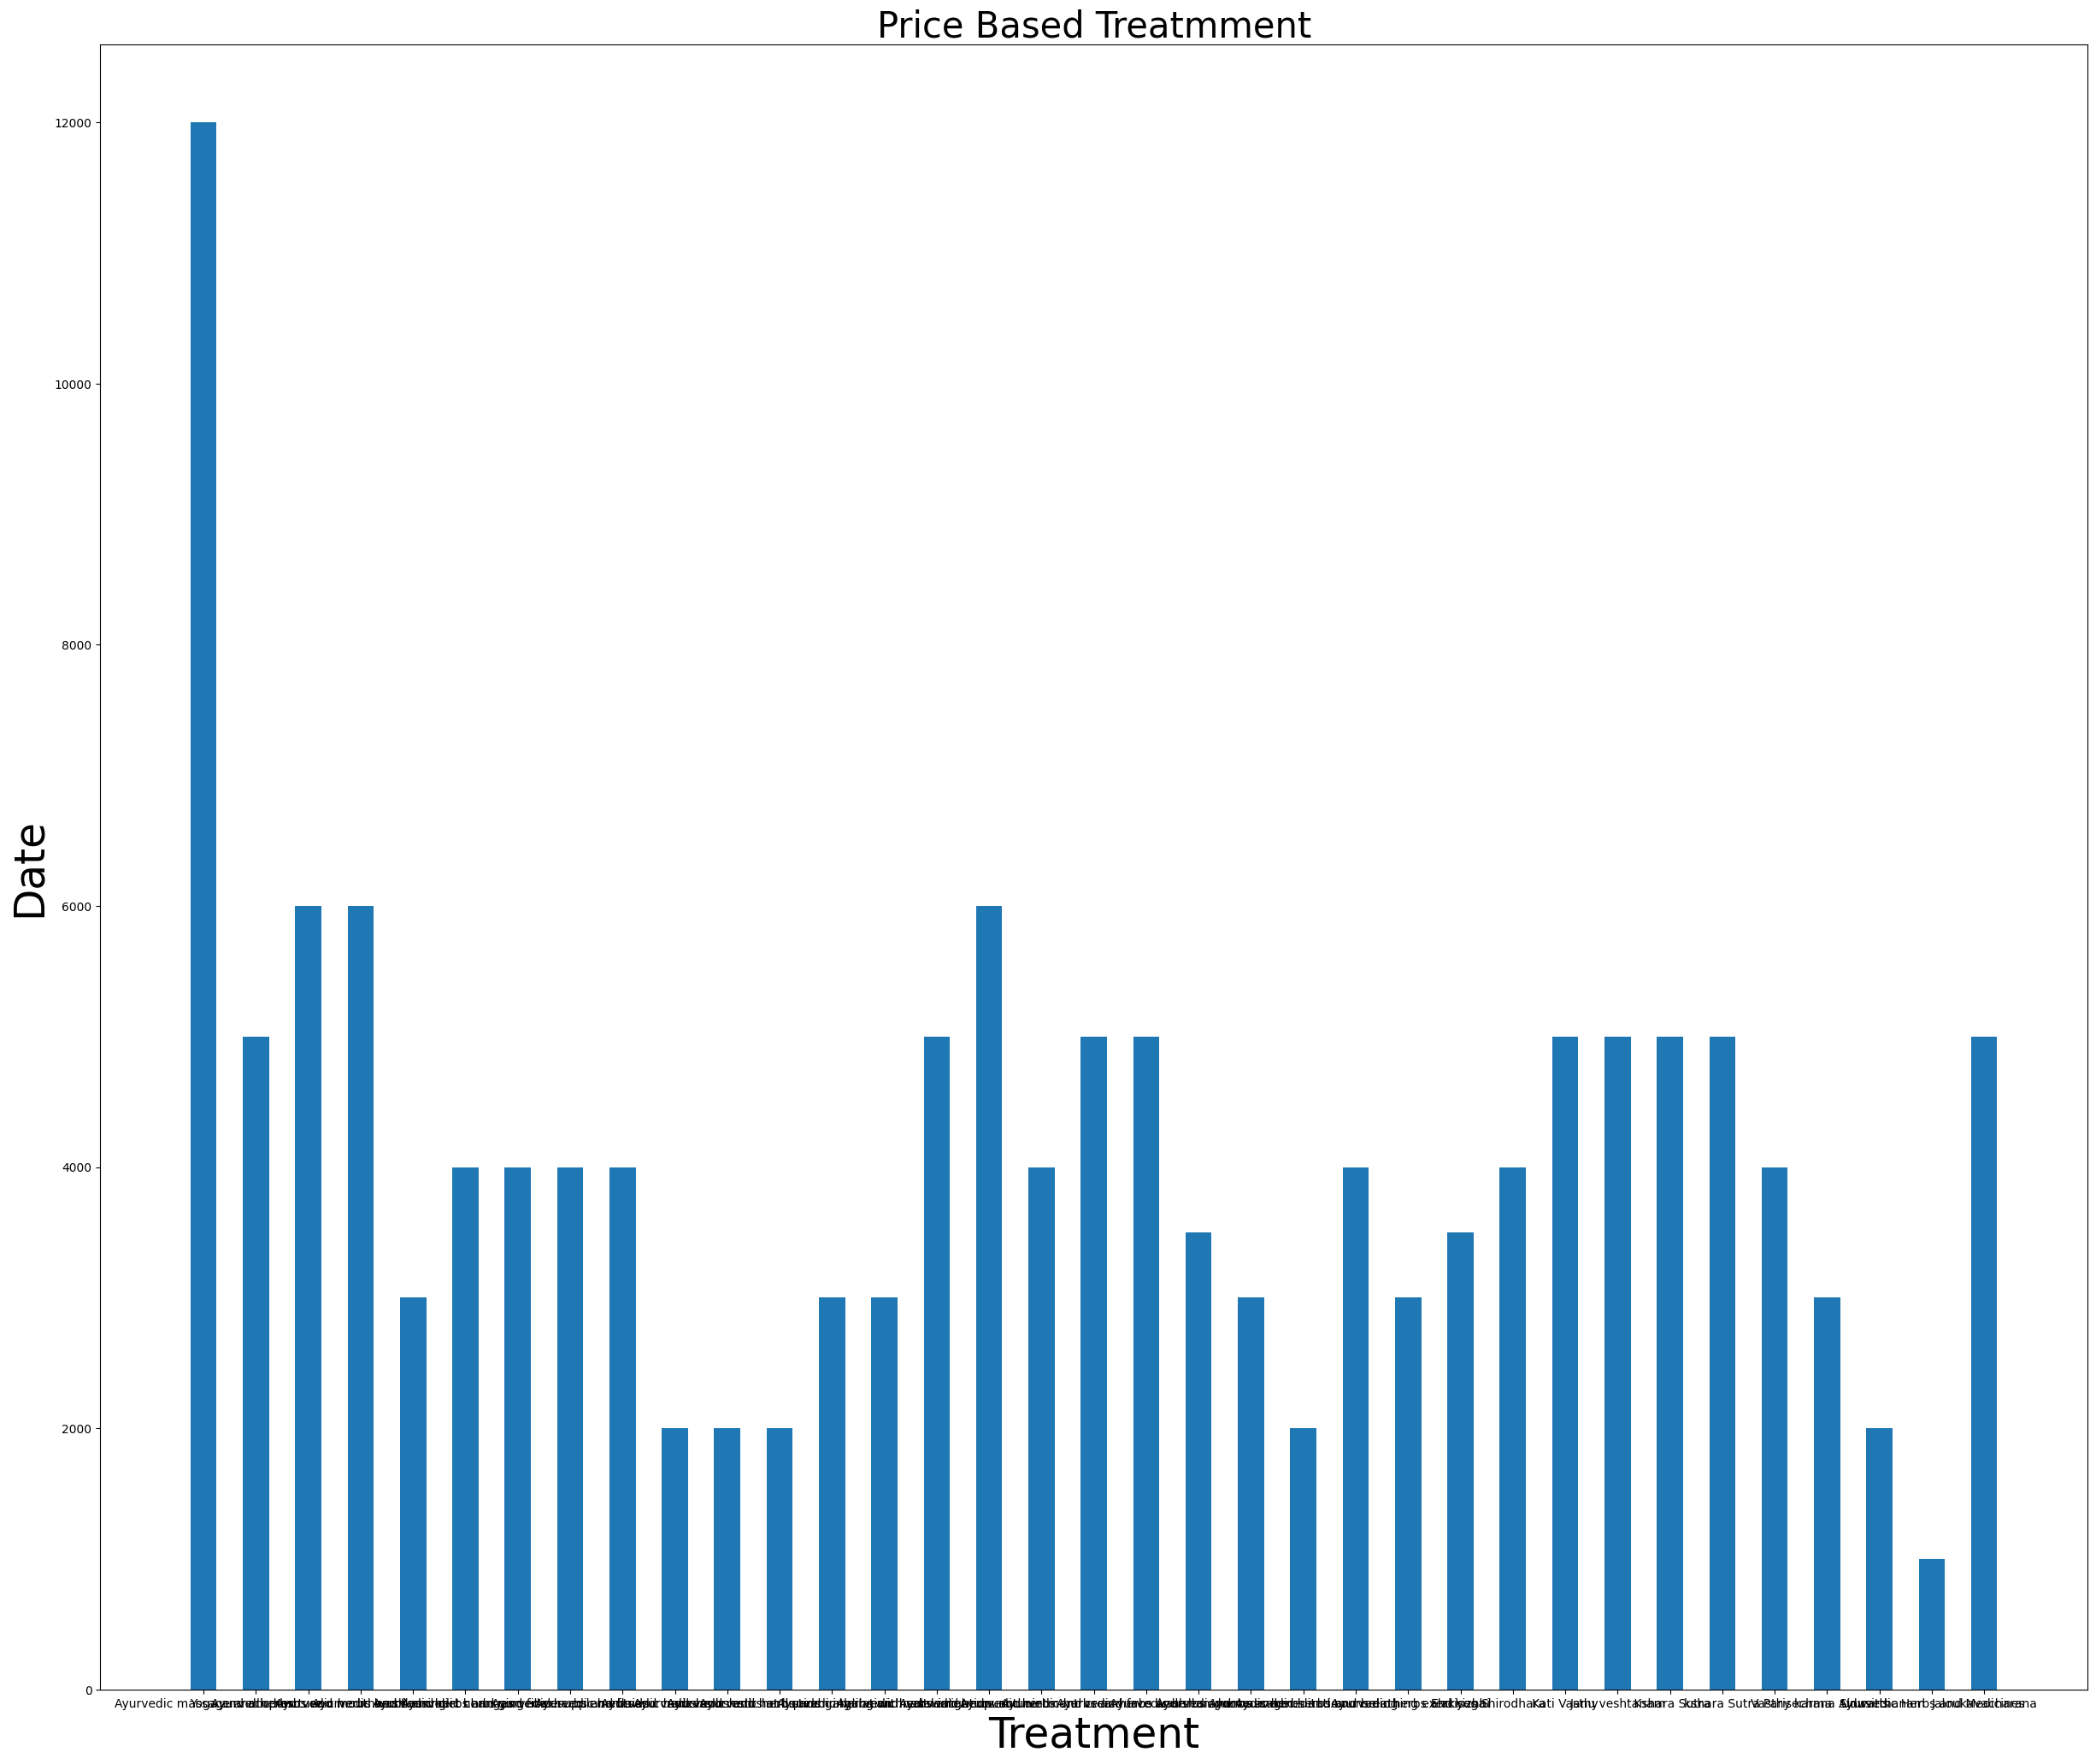

In [ ]:
# Bar Graph
from matplotlib import pyplot as plt
plt.figure(figsize=(30,25))
plt.bar(data["Treatment"],data["Price"],width=0.5)
plt.title("Price Based Treatmment",fontsize=30)
plt.xlabel("Treatment",fontsize=35)
plt.ylabel("Date",fontsize=35)
plt.show()

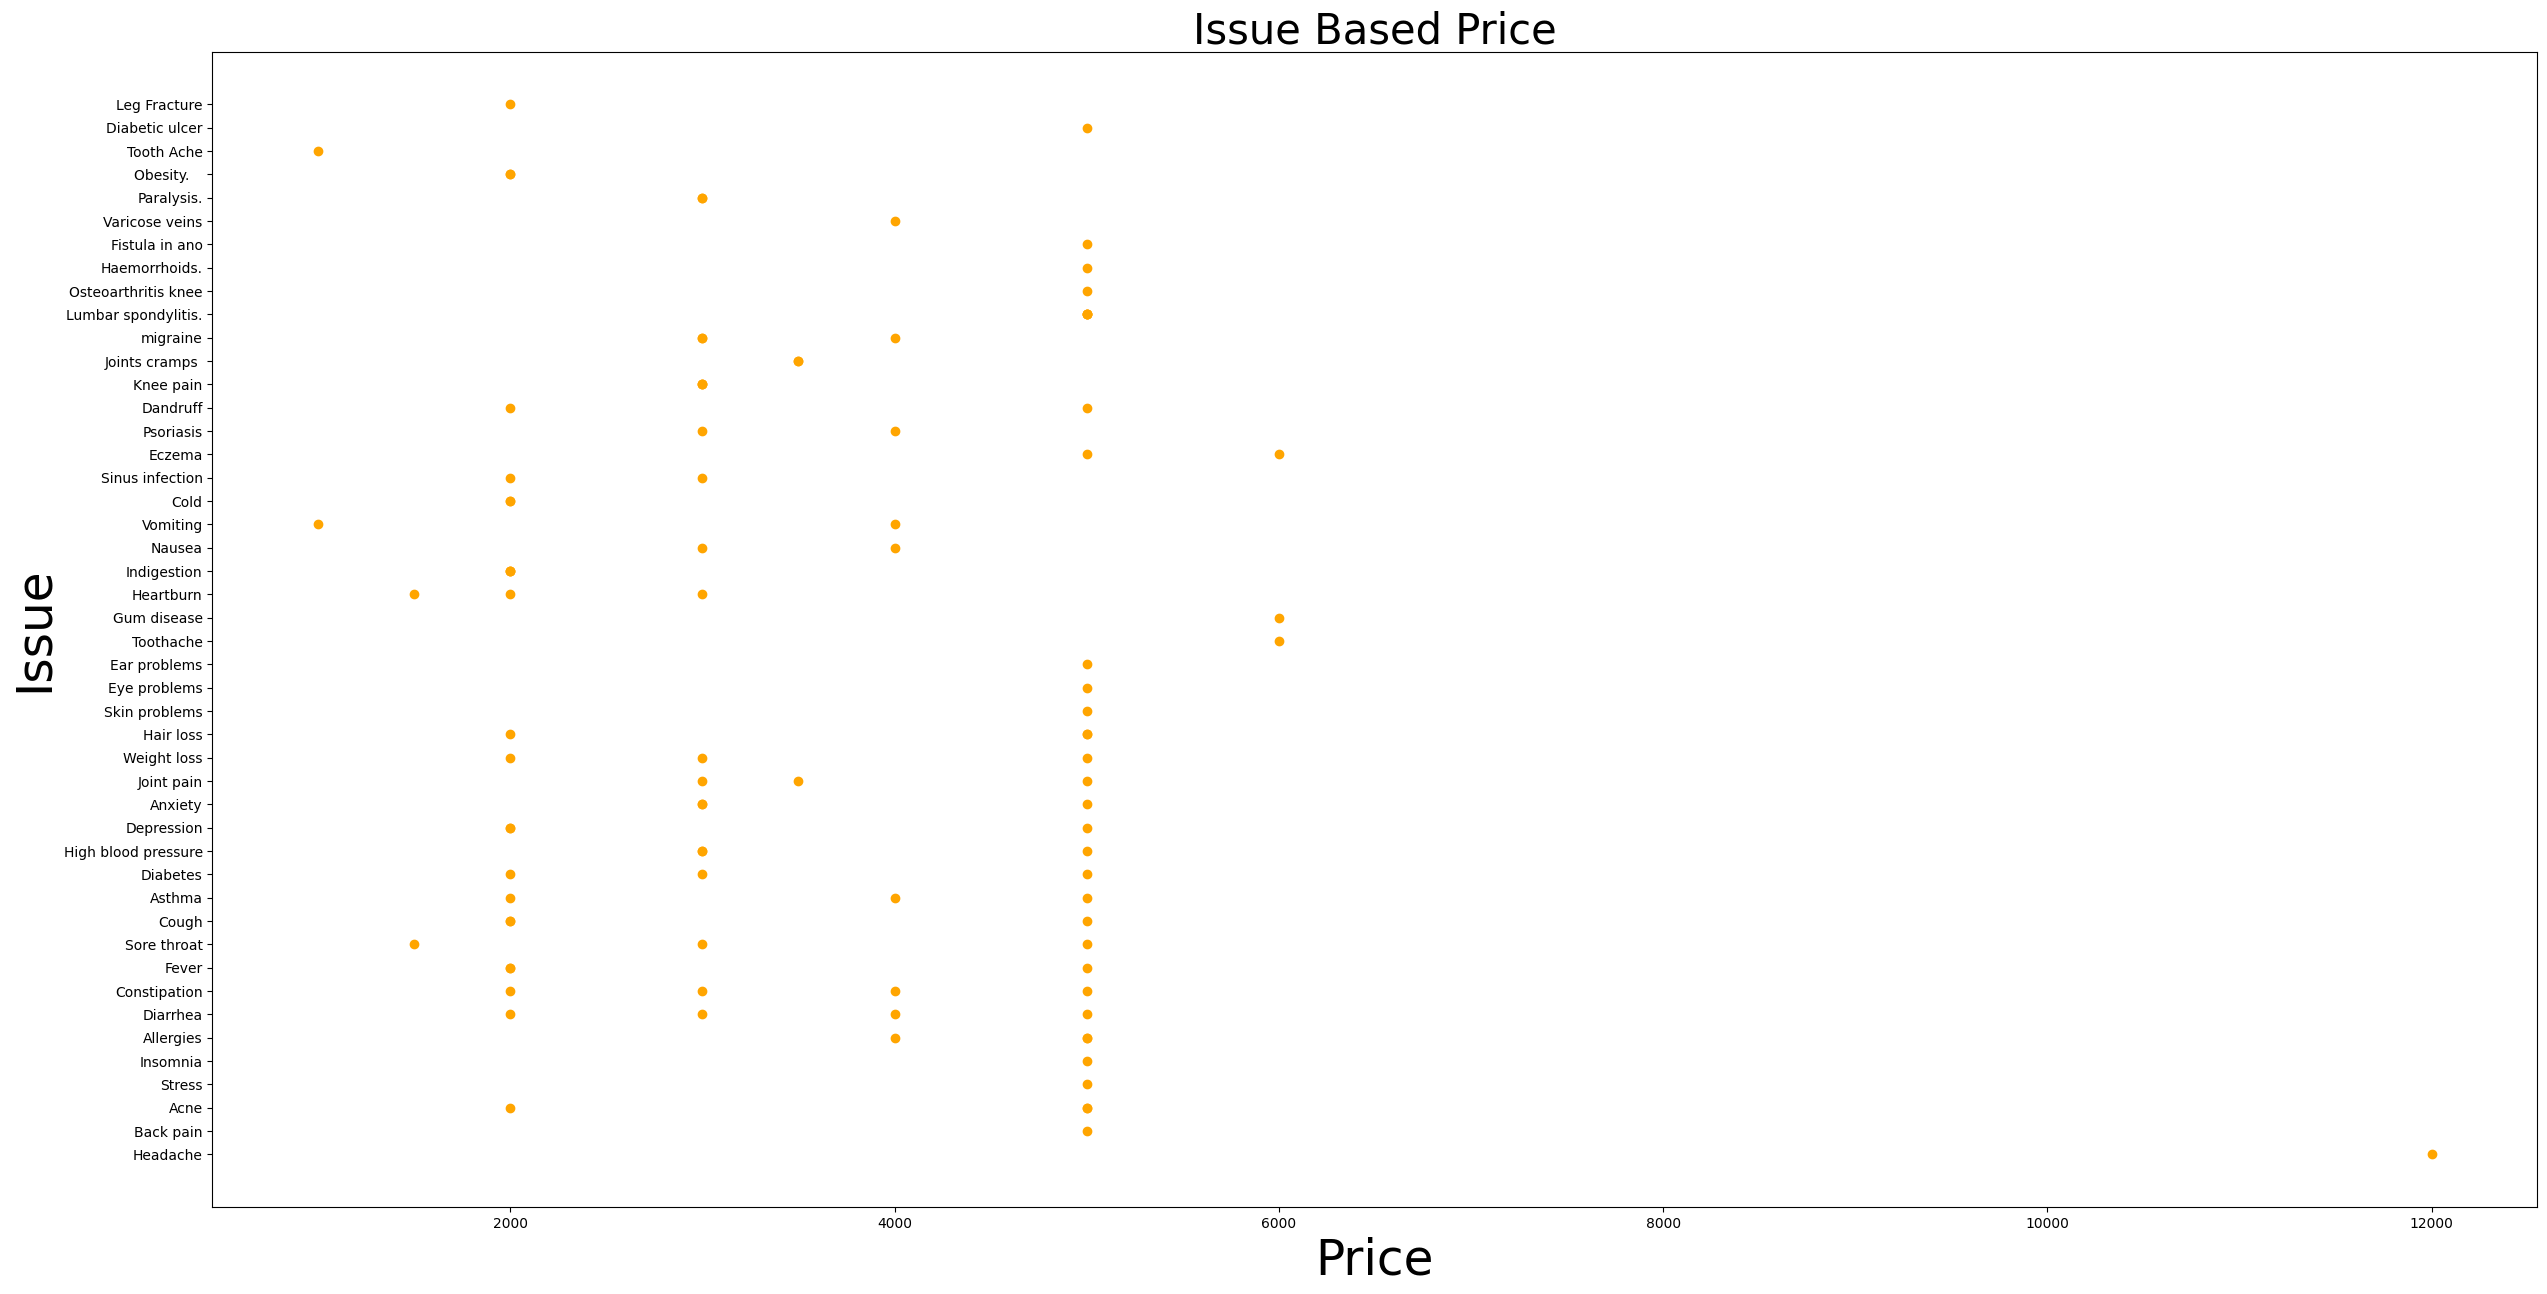

In [ ]:
# Scatter plot
plt.figure(figsize=(30,15))
plt.scatter(data["Price"],data["Issue"],color="orange")
plt.title("Issue Based Price",fontsize=30)
plt.xlabel("Price",fontsize=35)
plt.ylabel("Issue",fontsize=35)
plt.show()

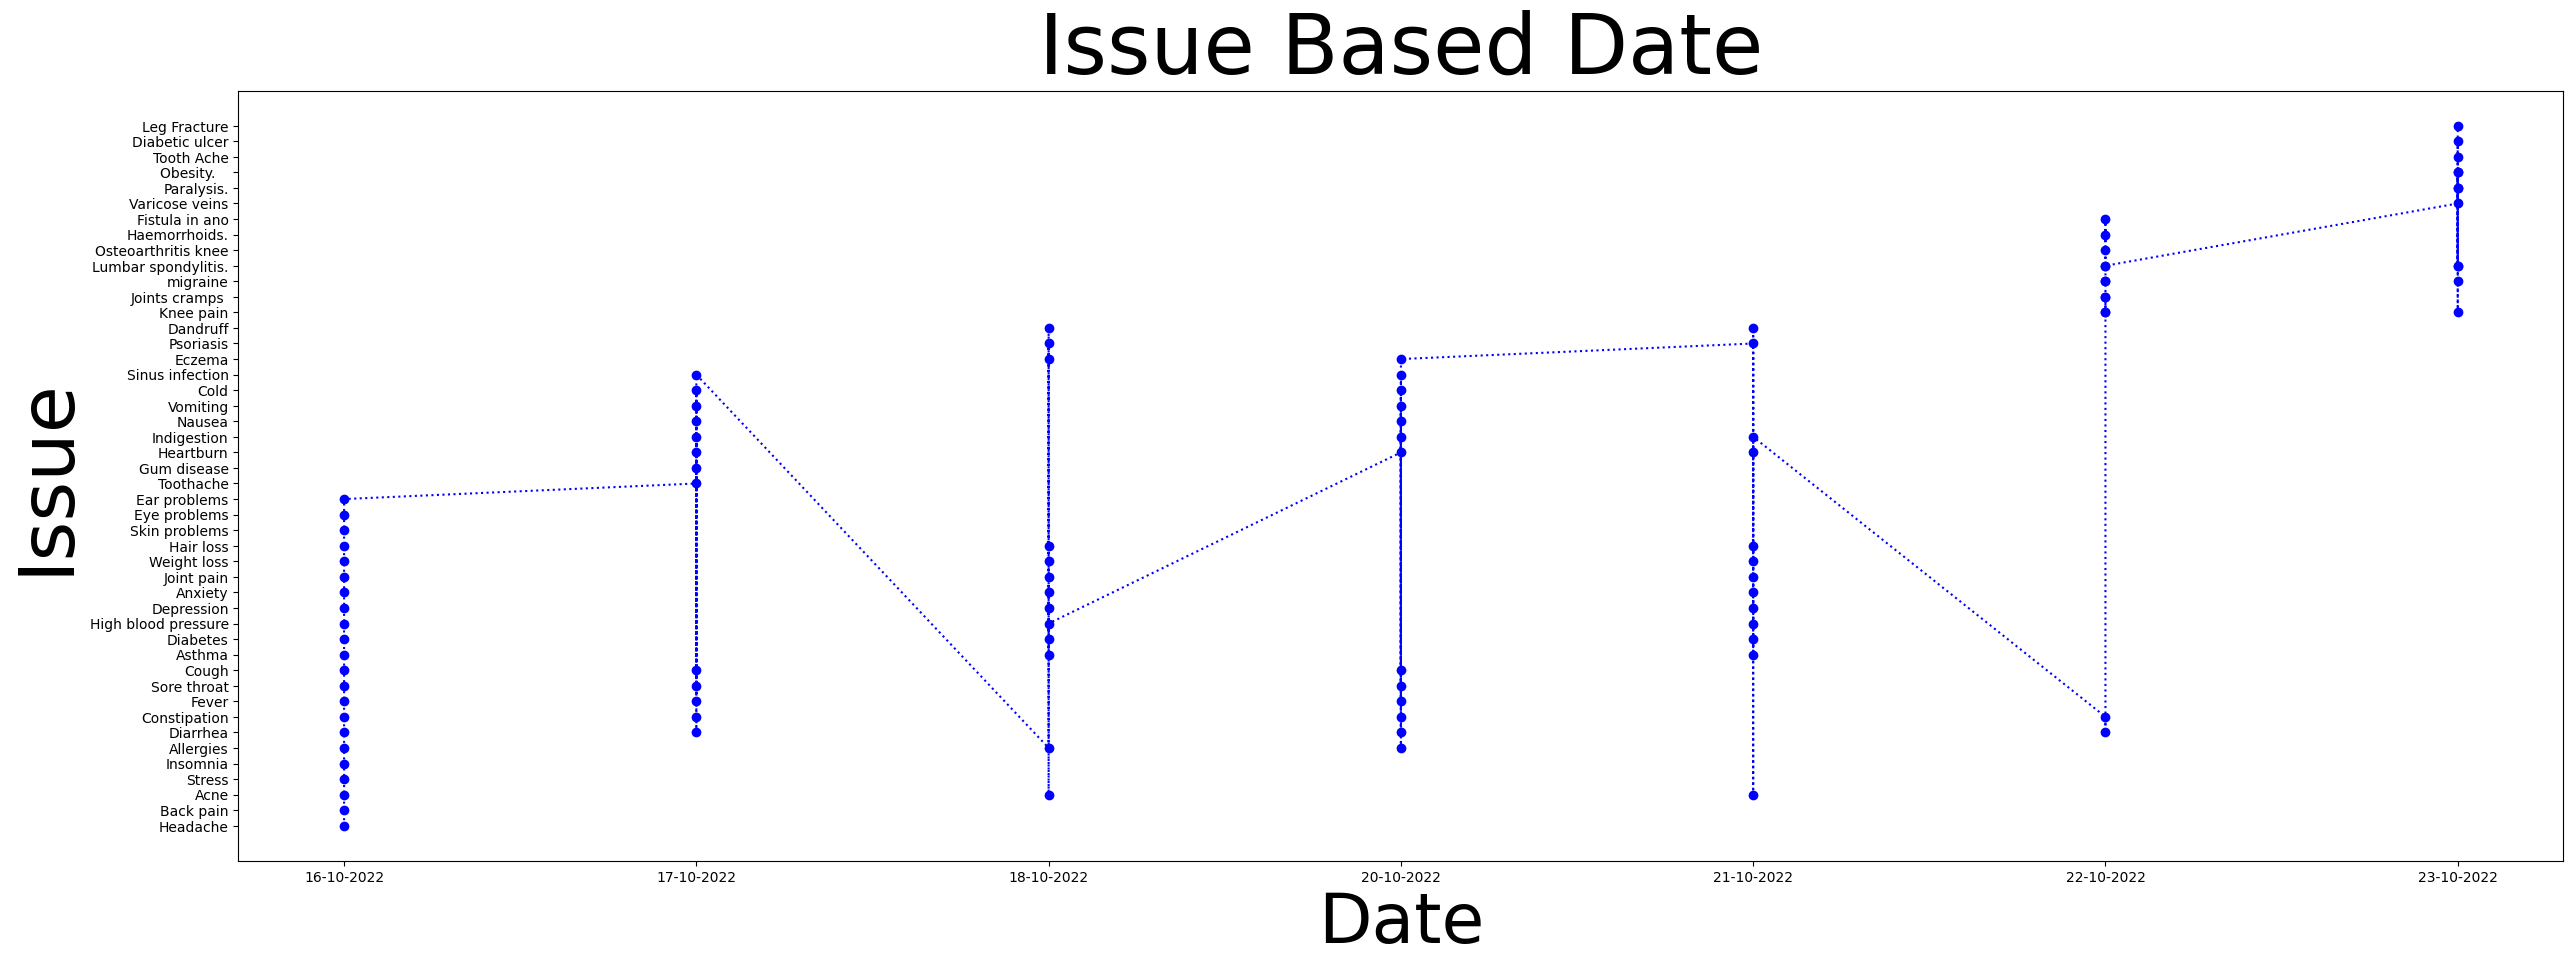

In [ ]:
# Lineplot
plt.figure(figsize=(30,10))
plt.plot(data["Date"],data["Issue"],marker="o",linestyle=":",color="blue",label=data)
plt.title("Issue Based Date",fontsize=60)
plt.xlabel("Date",fontsize=50)
plt.ylabel("Issue",fontsize=55)
plt.show()

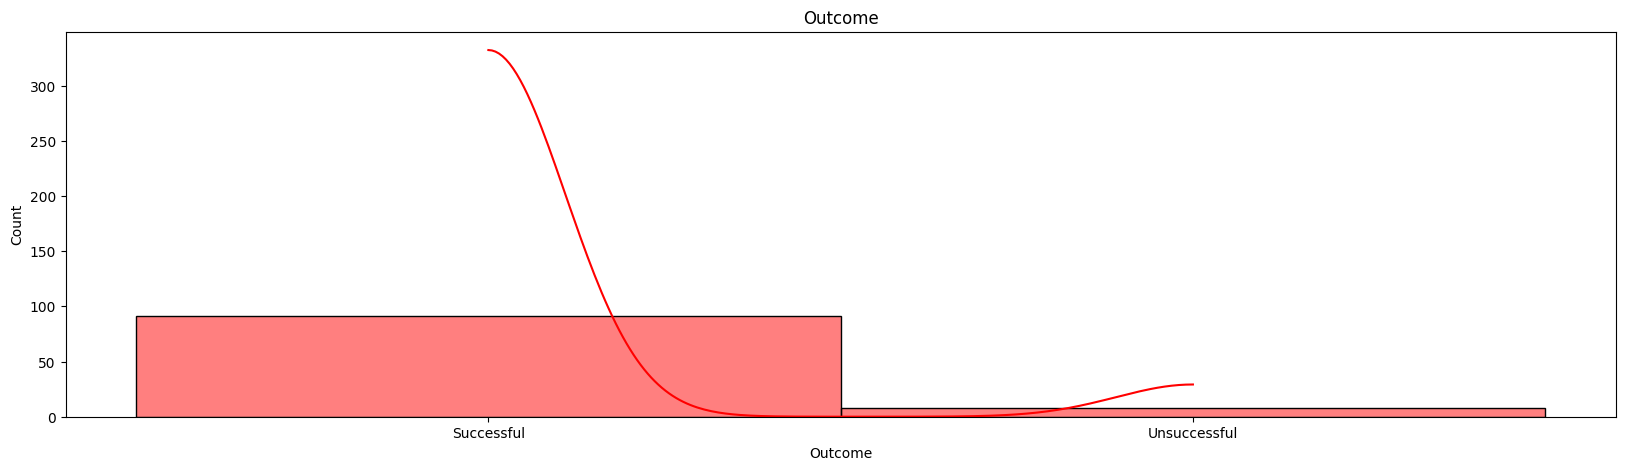

In [ ]:
# Histplot
import seaborn as sns
plt.figure(figsize=(20,5))
sns.histplot(data["Outcome"],bins=1,edgecolor='black', kde=True,color="red")
plt.title("Outcome")
plt.show()

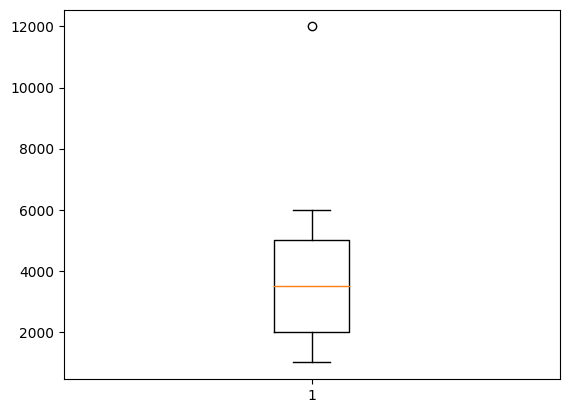

In [ ]:
# Boxplot
plt.boxplot(data["Price"])
plt.show()

In [ ]:
sns.pairplot(data,diag_kind="kde", markers="+")
plt.show()

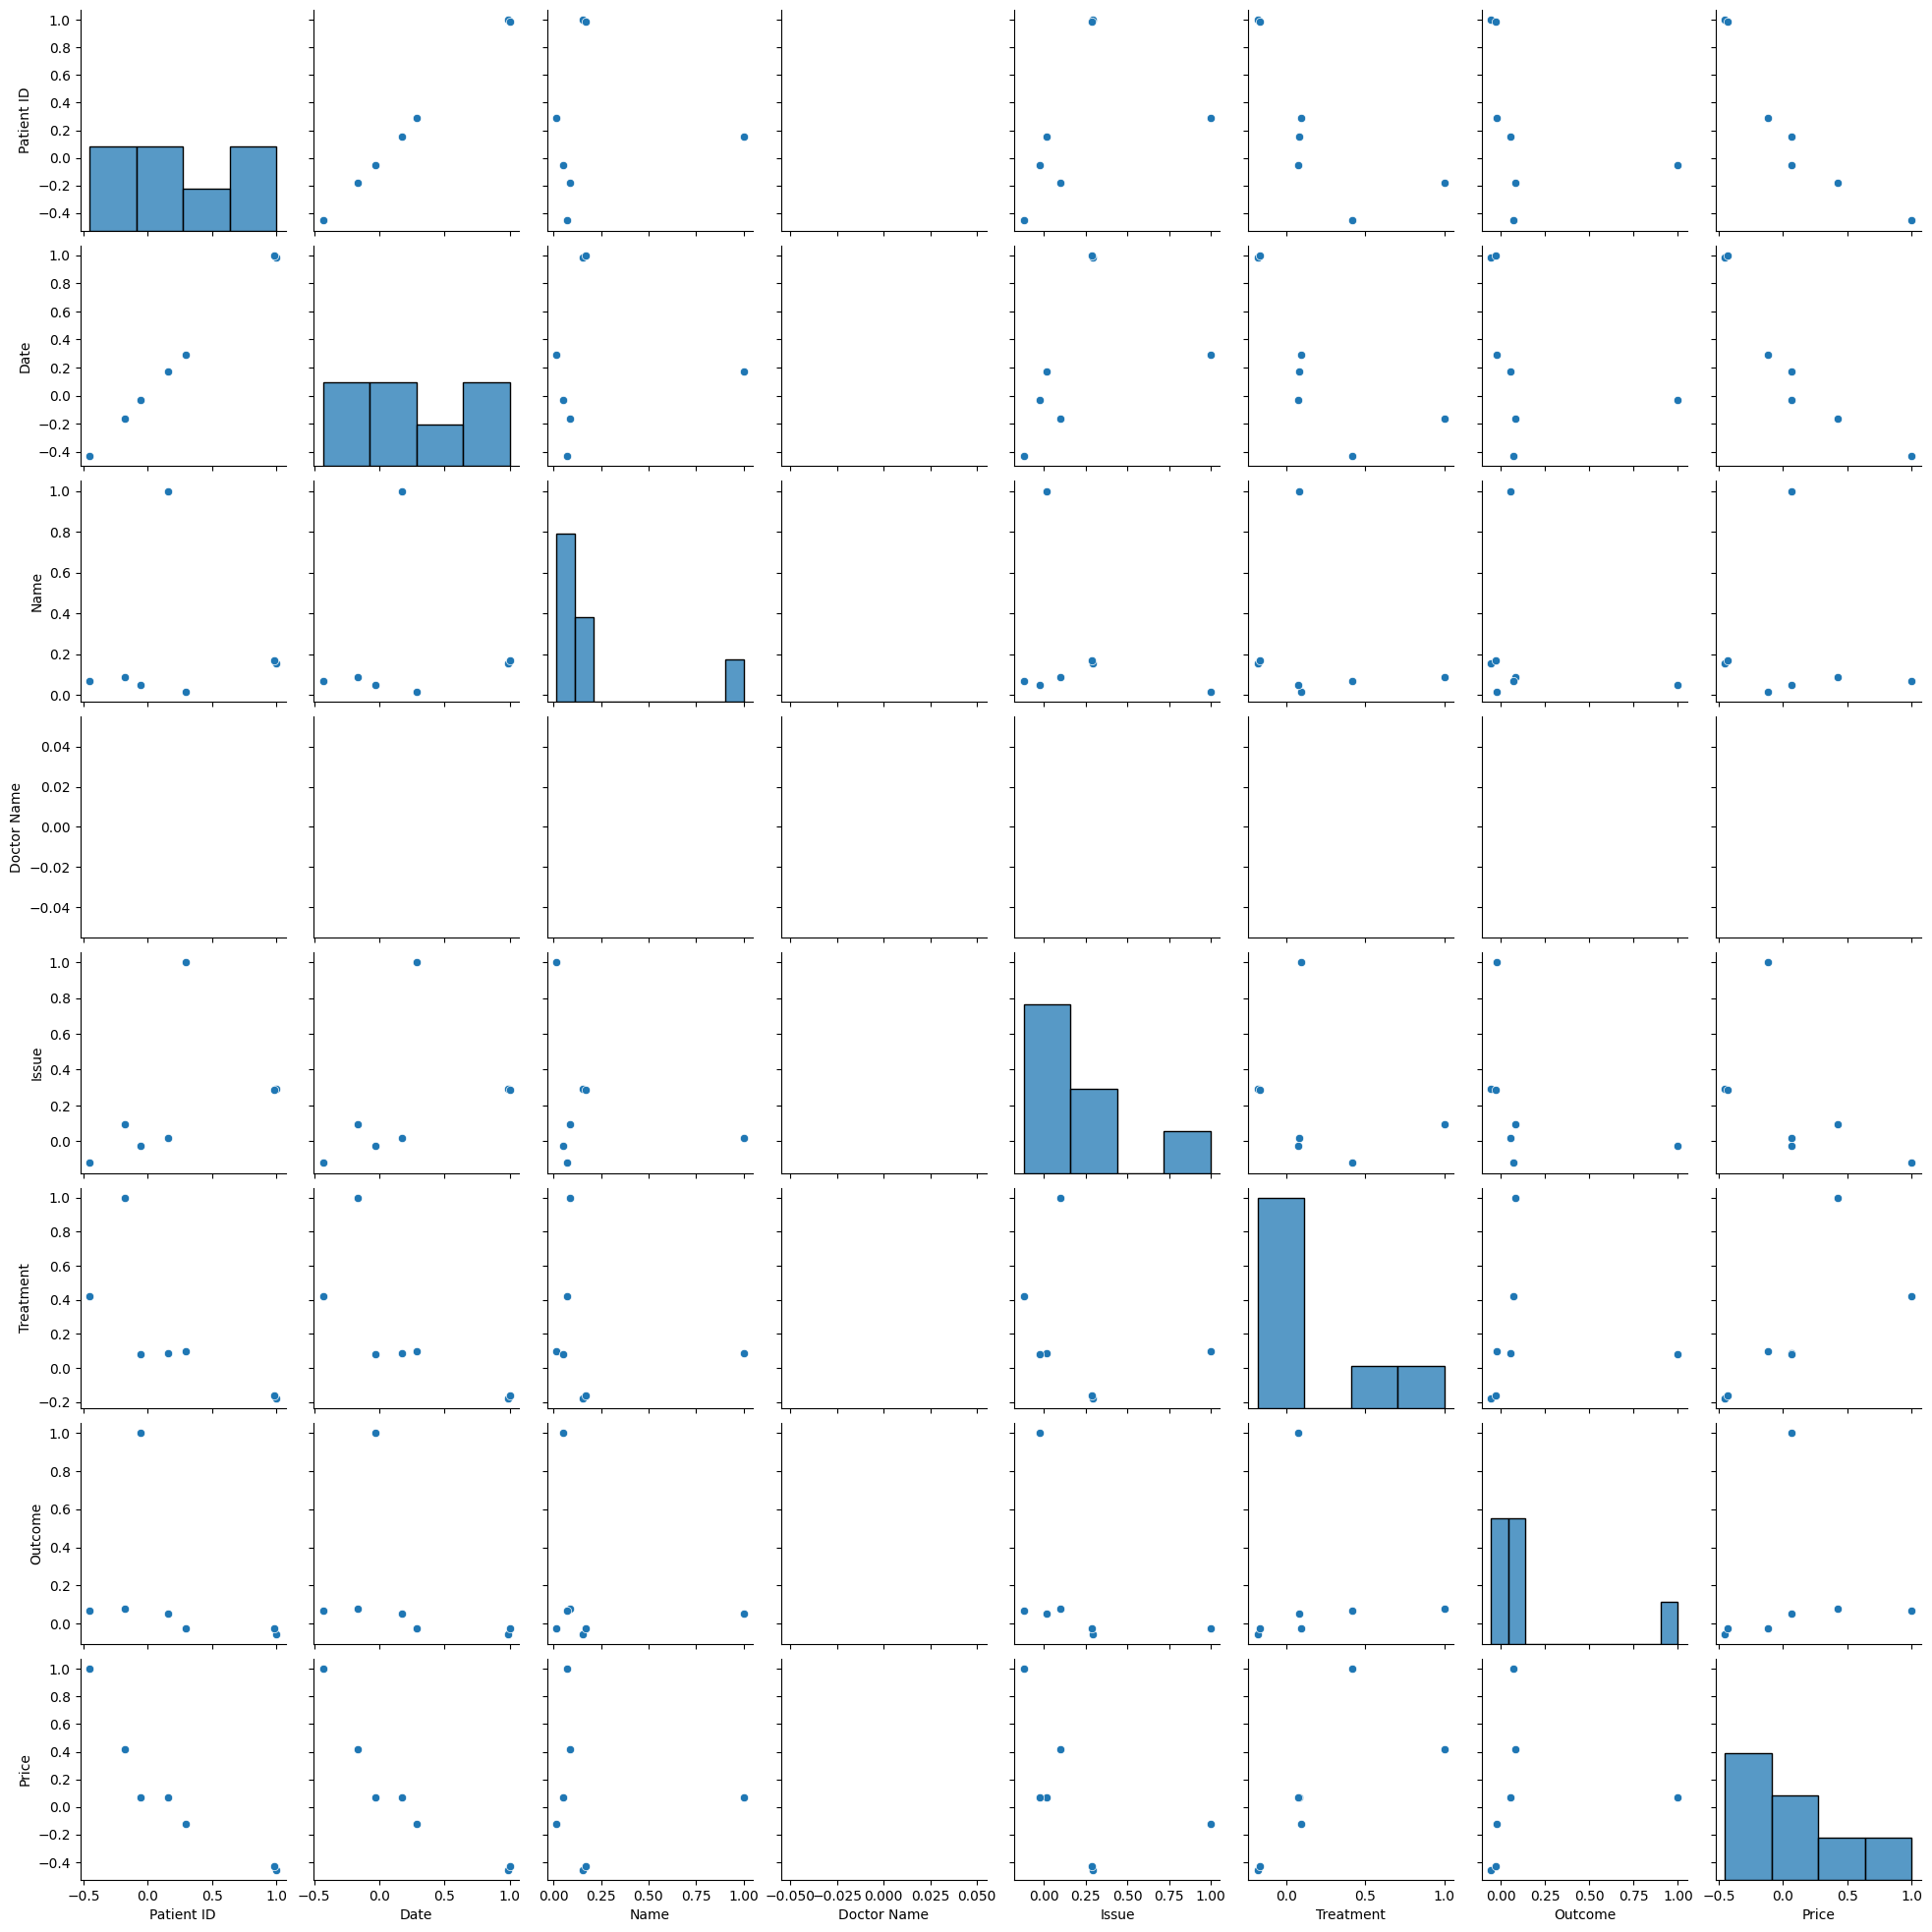

In [ ]:
import seaborn as sns
sns.pairplot(data=data.corr())
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
col=["Patient ID","Date","Name","Doctor Name","Issue","Treatment","Outcome","Price"]
n1=LabelEncoder()

for i in col:
 data[i]=n1.fit_transform(data[i])

In [ ]:
data.sample(5)

,Patient ID,Date,Name,Doctor Name,Issue,Treatment,Outcome,Price
56,56,3,68,0,7,23,0,2
89,89,6,36,0,32,34,0,2
75,75,5,41,0,12,12,0,2
84,84,5,70,0,19,1,0,6
57,57,3,51,0,38,13,0,3


In [ ]:
data.describe()

,Patient ID,Date,Name,Doctor Name,Issue,Treatment,Outcome,Price
count,99.000000,99.000000,99.000000,99.0,99.000000,99.000000,99.000000,99.000000
mean,49.000000,2.696970,35.818182,0.0,21.010101,20.131313,0.080808,4.070707
std,28.722813,2.087155,23.696363,0.0,13.615339,10.318051,0.273927,1.901946
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,24.500000,1.000000,15.000000,0.0,9.000000,10.500000,0.000000,2.000000
50%,49.000000,3.000000,35.000000,0.0,22.000000,22.000000,0.000000,4.000000
75%,73.500000,4.500000,56.500000,0.0,31.500000,31.000000,0.000000,6.000000
max,98.000000,6.000000,77.000000,0.0,45.000000,34.000000,1.000000,8.000000


In [ ]:
x=data[["Date","Treatment","Price"]]
y=data[["Issue"]]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,random_state=0,test_size=0.3)

In [ ]:
def model_Test(model,x,y_test):
  model = model
  model.fit(x,y_test)
  y_pred = model.predict(x)

  from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,f1_score,precision_score
  cm = confusion_matrix(y_test, y_pred)

  accuracy = accuracy_score(y_test, y_pred)*100
  print('Testing Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=20000)
model_Test(model,x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Accuracy of our model is equal 33.33 %.


In [ ]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
model_Test(model,x_train,y_train)

Testing Accuracy of our model is equal 73.91 %.


<ipython-input-36-68027746e34c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y_test)


In [ ]:
model_Test(model,x_test,y_test)

Testing Accuracy of our model is equal 80.0 %.


<ipython-input-36-68027746e34c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y_test)


In [ ]:
model=ExtraTreesClassifier()
model_Test(model,x_train,y_train)

Testing Accuracy of our model is equal 73.91 %.


<ipython-input-36-68027746e34c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y_test)


In [ ]:
model_Test(model,x_test,y_test)

Testing Accuracy of our model is equal 80.0 %.


<ipython-input-36-68027746e34c>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x,y_test)
